In [60]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
#request_url = "https://api.stlouisfed.org/fred/series/observations?series_id="
#api_key = 'b5502ae55769834eb4c100cd539168ed'

In [62]:
fred = Fred(api_key='b5502ae55769834eb4c100cd539168ed')

In [63]:
fred.search('manufacturing production').T

series id,IPMAN,IPGMFN,IPGMFSQ,IPGMFNQ,AWHMAN,CEU3000000007,CES3000000008,AHEMAN,PCU3364133641,PCU33643364,...,MSFURNMANRGSP,RGMPCHEMMANUSMP,SESTFOODBEVTOBMANNGSP,CTFOODBEVTOBMANNGSP,KYFOODBEVTOBMANNGSP,AZCPUELCPMANRGSP,FLCPUELCPMANRGSP,VTFOODBEVTOBMANNGSP,NYAPPLEATHMANNGSP,Y015RG3A086NBEA
frequency,Monthly,Monthly,Quarterly,Quarterly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual
frequency_short,M,M,Q,Q,M,M,M,M,M,M,...,A,A,A,A,A,A,A,A,A,A
id,IPMAN,IPGMFN,IPGMFSQ,IPGMFNQ,AWHMAN,CEU3000000007,CES3000000008,AHEMAN,PCU3364133641,PCU33643364,...,MSFURNMANRGSP,RGMPCHEMMANUSMP,SESTFOODBEVTOBMANNGSP,CTFOODBEVTOBMANNGSP,KYFOODBEVTOBMANNGSP,AZCPUELCPMANRGSP,FLCPUELCPMANRGSP,VTFOODBEVTOBMANNGSP,NYAPPLEATHMANNGSP,Y015RG3A086NBEA
last_updated,2019-05-15 08:28:01-05:00,2019-05-15 08:28:02-05:00,2019-05-15 08:28:03-05:00,2019-05-15 08:28:04-05:00,2019-05-03 08:04:01-05:00,2019-05-03 08:04:04-05:00,2019-05-03 08:04:01-05:00,2019-05-03 08:04:03-05:00,2019-05-09 07:54:02-05:00,2019-05-09 07:53:13-05:00,...,2019-05-01 07:48:29-05:00,2018-09-18 08:31:50-05:00,2018-11-19 16:09:01-06:00,2018-11-19 16:10:51-06:00,2018-11-19 16:07:51-06:00,2018-11-19 16:18:46-06:00,2018-11-19 16:10:36-06:00,2018-11-19 16:07:54-06:00,2018-11-19 16:09:29-06:00,2018-08-08 14:11:32-05:00
notes,None,The industrial production (IP) index measures ...,The industrial production (IP) index measures ...,The industrial production (IP) index measures ...,Average weekly hours relate to the average hou...,Average weekly hours relate to the average hou...,Production and related employees include worki...,Production and related employees include worki...,None,None,...,For more information about this release go to ...,The Chemical Manufacturing NAICS subsector is ...,For more information about this release go to ...,For more information about this release go to ...,For more information about this release go to ...,For more information about this release go to ...,For more information about this release go to ...,For more information about this release go to ...,For more information about this release go to ...,BEA Account Code: Y015RG A Guide to the Natio...
observation_end,2019-04-01 00:00:00,2019-04-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-04-01 00:00:00,2019-04-01 00:00:00,2019-04-01 00:00:00,2019-04-01 00:00:00,2019-04-01 00:00:00,2019-04-01 00:00:00,...,2017-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00
observation_start,1972-01-01 00:00:00,1972-01-01 00:00:00,1972-01-01 00:00:00,1972-01-01 00:00:00,1939-01-01 00:00:00,1939-01-01 00:00:00,1939-01-01 00:00:00,1939-01-01 00:00:00,1985-06-01 00:00:00,1985-06-01 00:00:00,...,1997-01-01 00:00:00,2001-01-01 00:00:00,1997-01-01 00:00:00,1997-01-01 00:00:00,1997-01-01 00:00:00,1997-01-01 00:00:00,1997-01-01 00:00:00,1997-01-01 00:00:00,1997-01-01 00:00:00,1959-01-01 00:00:00
popularity,63,31,22,15,56,10,46,25,41,9,...,1,1,1,1,1,1,1,1,1,1
realtime_end,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,...,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00
realtime_start,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,...,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00,2019-05-21 00:00:00


In [64]:
industrial_production = fred.get_series('IPMAN')
industrial_production

1972-01-01     36.6924
1972-02-01     36.9567
1972-03-01     37.1965
1972-04-01     37.6440
1972-05-01     37.6836
1972-06-01     37.8022
1972-07-01     37.8128
1972-08-01     38.3031
1972-09-01     38.5731
1972-10-01     39.1695
1972-11-01     39.6756
1972-12-01     40.2595
1973-01-01     40.5321
1973-02-01     41.1963
1973-03-01     41.2768
1973-04-01     41.2179
1973-05-01     41.4853
1973-06-01     41.4705
1973-07-01     41.6769
1973-08-01     41.5521
1973-09-01     41.9460
1973-10-01     42.2962
1973-11-01     42.6218
1973-12-01     42.6488
1974-01-01     42.2744
1974-02-01     42.0910
1974-03-01     42.0853
1974-04-01     41.8849
1974-05-01     42.1703
1974-06-01     42.2289
                ...   
2016-11-01    101.5178
2016-12-01    101.8808
2017-01-01    102.4892
2017-02-01    102.4152
2017-03-01    102.1635
2017-04-01    103.3416
2017-05-01    103.1555
2017-06-01    103.2793
2017-07-01    103.1101
2017-08-01    102.8276
2017-09-01    102.7012
2017-10-01    104.0931
2017-11-01 

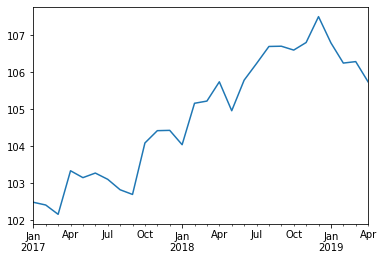

In [65]:
time_clipped = industrial_production.loc['20170101':'20190521']
time_clipped.plot()

In [66]:
def get_series(series, start_date, end_date):
    return fred.get_series(series).loc[start_date : end_date]

In [67]:
start_date = '20170101'
end_date = '20190501'

In [75]:
industrial_production = get_series('IPMAN', start_date, end_date)
production_hours = get_series('CEU3000000007', start_date, end_date)
durable_production = get_series('AWHAE', start_date, end_date)

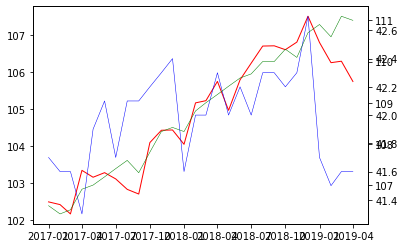

In [76]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.plot(industrial_production, color='r', linewidth=1)
ax2.plot(production_hours, color='b', linewidth=0.5)
ax3.plot(durable_production, color='g', linewidth=0.5)

In [77]:
data_table = industrial_production.to_frame(name='Industrial Production')
data_table = data_table.join(production_hours.to_frame(name='Production Hours'))
data_table = data_table.join(durable_production.to_frame(name='Durable Production'))
data_table

,Industrial Production,Production Hours,Durable Production
2017-01-01,102.4892,41.7,106.5
2017-02-01,102.4152,41.6,106.3
2017-03-01,102.1635,41.6,106.4
2017-04-01,103.3416,41.3,106.9
2017-05-01,103.1555,41.9,107.0
2017-06-01,103.2793,42.1,107.2
2017-07-01,103.1101,41.7,107.4
2017-08-01,102.8276,42.1,107.6
2017-09-01,102.7012,42.1,107.3
2017-10-01,104.0931,42.2,107.8
